In [31]:
import urllib.request as urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup #beautifulsoup4 
from pprint import pprint
from wordcloud import WordCloud


ModuleNotFoundError: No module named 'stopwords'

In [2]:
# pd.Series(BeautifulSoup(str(soup.findAll('b'))).getText().split(":,")).value_counts() > 10

<b>Scripts from a website were extracted and strored into text files</b> <br>


In [3]:
csv_list = []
char_name = []
dialogue= []
for j in range(1,9):
    for i in range(1,24): 
        try:
            text_file = open(f"S{j}/Season{j}{i}.txt", "r")
            l=(text_file.read())
            soup = BeautifulSoup(l)
            csv_list += ([p.get_text().split(':') for p in soup.findAll('p') if ':' in str(p)])
        except:
            continue
#   print(csv_list,'\n\n')
csv_list = [p for p in csv_list if len(p)==2]
# pprint(pd.Series(csv_list).apply(len)==3)
char_name += ([p[0] for p in csv_list])
dialogue += ([p[1] for p in csv_list])

In [4]:
frnds_df = pd.DataFrame({'Char':char_name,'Diag':dialogue})
frnds_df.info(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41075 entries, 0 to 41074
Data columns (total 2 columns):
Char    41075 non-null object
Diag    41075 non-null object
dtypes: object(2)
memory usage: 641.9+ KB


In [5]:
frnds_df.sample(7)

,Char,Diag
13817,Joey,"All right, that’s it! He cannot do this to Ph..."
30964,Chandler,"Okay, is this lamp in the same place?"
31917,Ross,It’s my joke.
22618,Drunk Man,My god!! You must have been a\n\nteenage when...
29577,Monica,"Umm, when I said that uh, that Chandler and I..."
19884,Phoebe,Don’t you just love the way they talk?!
23254,Chandler,"Hey, Pheebs!"


<BarContainer object of 15 artists>

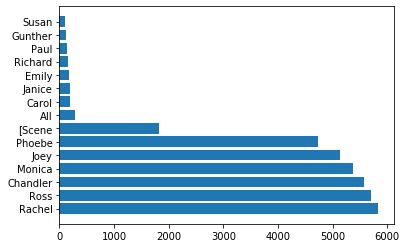

In [6]:
# s=frnds_df.Diag[2]
# print(s.split())
frnds_df.Char.value_counts()
plt.barh(frnds_df.Char.value_counts()[0:15].index,frnds_df.Char.value_counts()[0:15])

In [7]:
lis1=frnds_df.Char.value_counts().nlargest(6).index.tolist()
print(lis1)
frnds_df =  frnds_df[frnds_df.Char.isin(lis1)]
# print(frnds_df.Char.isin(lis1))


['Rachel', 'Ross', 'Chandler', 'Monica', 'Joey', 'Phoebe']


<h3>As you can see all six relevent chracters seem to have around 5000 dialogues in total</h3><hr>

Rachel      5837
Ross        5705
Chandler    5570
Monica      5378
Joey        5136
Phoebe      4735
Name: Char, dtype: int64


<BarContainer object of 6 artists>

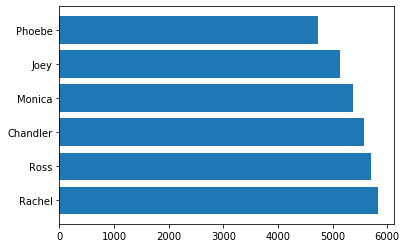

In [8]:
print((frnds_df.Char.value_counts()))
frnds_df.sample(5)
plt.barh(frnds_df.Char.value_counts().index,frnds_df.Char.value_counts())

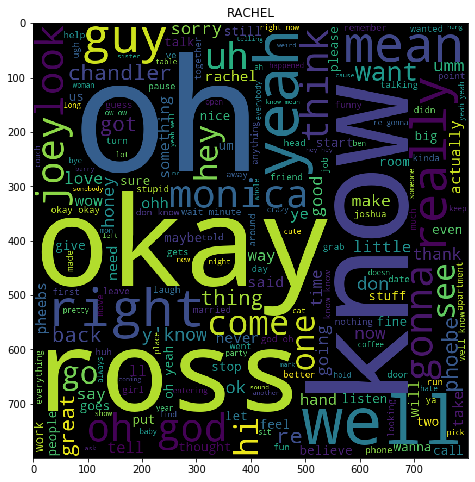

In [9]:
rach_df = frnds_df[frnds_df.Char == "Rachel"]
rach=''
for val in rach_df.Diag:
    val = val.lower()
    
    tokens = val.split()
    
    for words in tokens:
        rach = rach+words+' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(rach) 
plt.figure(figsize=(8,8))
plt.title('RACHEL')
plt.imshow(wordcloud)


In [10]:
print(pd.Series(rach.split()).value_counts().nlargest(30))
print(len(rach.split()))

i        2401
you      1947
the      1500
to       1352
a        1142
and      1110
that      710
just      630
is        595
my        538
it        517
this      495
of        480
oh        462
in        460
what      437
so        415
not       406
oh,       405
have      398
was       397
with      373
we        358
all       343
do        340
but       339
on        333
are       332
well,     329
for       328
dtype: int64
64557


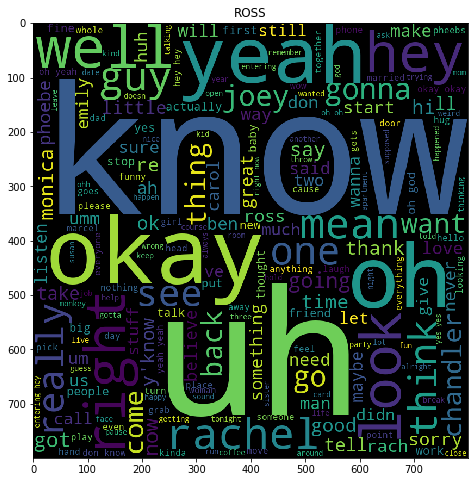

In [11]:
ross_df = frnds_df[frnds_df.Char == "Ross"]
ross=''
for val in ross_df.Diag:
    val = val.lower()
    
    tokens = val.split()
    
    for words in tokens:
        ross = ross+words+' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(ross) 
plt.figure(figsize=(8,8))
plt.title('ROSS')
plt.imshow(wordcloud)


In [12]:
print(pd.Series(ross.split()).value_counts().nlargest(30))
print(len(ross.split()))

i       2078
the     1672
you     1668
to      1310
a       1191
and     1056
is       560
that     556
of       553
it       545
in       478
just     450
my       432
this     429
what     378
not      364
with     349
was      345
we       343
be       342
uh,      338
have     331
for      330
so       325
all      321
do       315
on       294
i'm      268
are      261
at       259
dtype: int64
63232


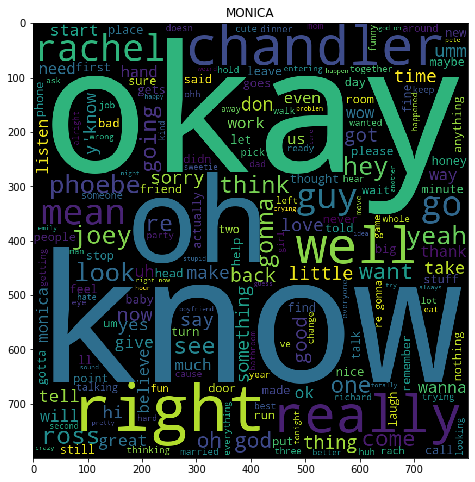

In [13]:
mon_df = frnds_df[frnds_df.Char == "Monica"]
mon=''
for val in mon_df.Diag:
    val = val.lower()
    
    tokens = val.split()
    
    for words in tokens:
        mon = mon+words+' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(mon) 
plt.figure(figsize=(8,8))
plt.title('MONICA')
plt.imshow(wordcloud)

In [20]:
print(pd.Series(mon.split()).value_counts().nlargest(30))
print(len(mon.split()))

you     1859
i       1786
the     1453
to      1177
a        993
and      889
that     565
it       497
is       488
just     420
my       420
of       415
this     403
in       388
what     381
we       376
have     373
with     372
all      353
so       349
do       328
not      328
are      316
for      308
be       308
oh       280
was      272
on       272
me       264
her      249
dtype: int64
55226


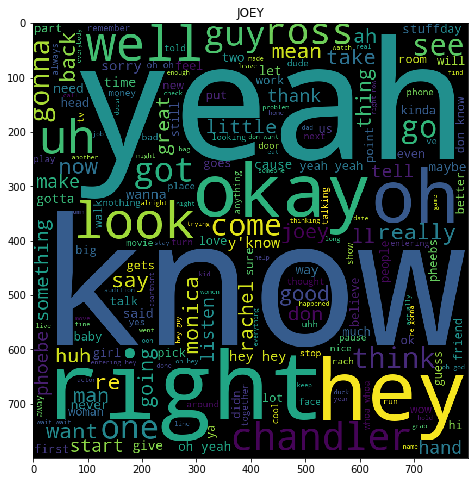

In [15]:
joey_df = frnds_df[frnds_df.Char == "Joey"]
joey=''
for val in joey_df.Diag:
    val = val.lower()
    
    tokens = val.split()
    
    for words in tokens:
        joey = joey+words+' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(joey) 
plt.figure(figsize=(8,8))
plt.title('JOEY')
plt.imshow(wordcloud)

In [16]:
print(pd.Series(joey.split()).value_counts().nlargest(30))
print(len(joey.split()))

i        2014
the      1683
you      1660
to       1238
a        1189
and      1036
that      542
it        539
of        498
in        455
is        412
all       403
my        399
with      392
this      392
what      361
just      357
for       341
on        317
like      313
we        308
me        301
so        300
get       292
not       291
do        291
was       287
be        284
yeah,     283
but       282
dtype: int64
59579


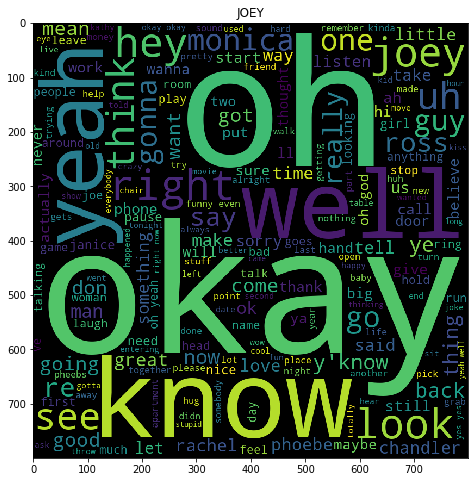

In [17]:
joey_df = frnds_df[frnds_df.Char == "Chandler"]
joey=''
for val in joey_df.Diag:
    val = val.lower()
    
    tokens = val.split()
    
    for words in tokens:
        joey = joey+words+' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(joey) 
plt.figure(figsize=(8,8))
plt.title('JOEY')
plt.imshow(wordcloud)

In [30]:
print(pd.Series(joey.split()).value_counts().nlargest(30))
print(len((pd.DataFrame(joey.split()))))

i        1889
the      1757
you      1692
to       1246
a        1174
and      1081
that      635
of        609
is        545
in        512
it        510
this      407
my        406
with      391
we        391
have      389
what      382
just      380
so        338
not       336
was       333
all       326
for       321
do        303
are       302
i'm       294
be        284
me        283
well,     282
at        267
dtype: int64
60655
